In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random, scipy
from ifitpy import Fitter
from ifitpy import Functions
from ifitpy import Utils
from ifitpy import Histograms

<IPython.core.display.Javascript object>


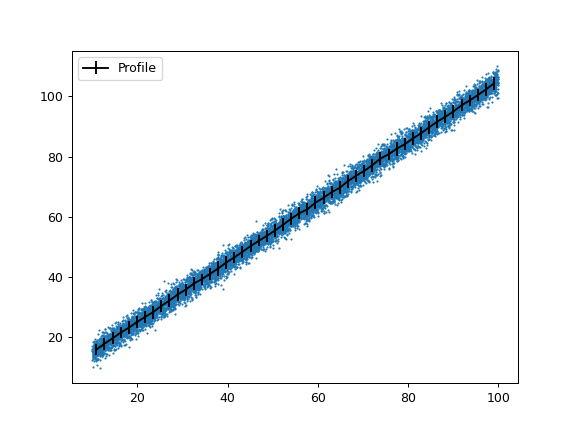

In [2]:
m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)


fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

pf1d = Histograms.Profile1D(50)
pf1d.fill(xx,yy)

plt.errorbar(pf1d.getBins(), pf1d.getMeans(), yerr=pf1d.getSigmas(), c="black", label="Profile")
plt.legend()

<IPython.core.display.Javascript object>


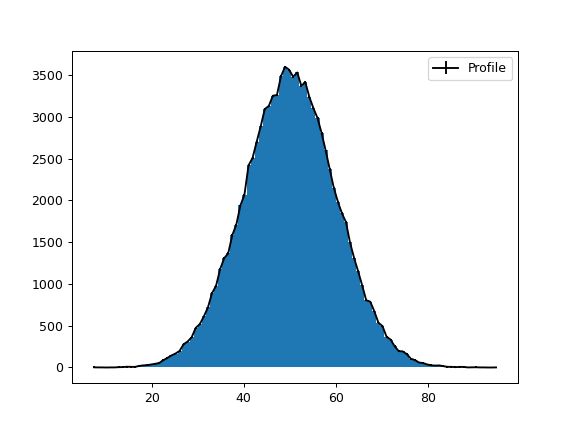

In [3]:
mu, sig = 50,10
yyt = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yyt, bins=100)

hist = Histograms.Histogram(100)
hist.fill(yyt)

plt.errorbar(hist.getBins(), hist.getMeans(), yerr=hist.getSigmas(), c="black", label="Profile")

plt.legend()

<IPython.core.display.Javascript object>


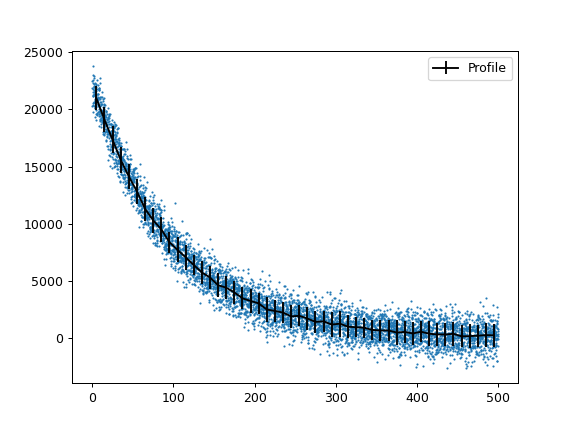

In [4]:
p0, p1 = 10, -0.01
xx = np.arange(0,500,0.1)
yy = np.exp(p0+p1*xx) +np.random.normal(50, 1000, size = xx.shape)

fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

pf1d = Histograms.Profile1D(50)
pf1d.fill(xx,yy)
plt.errorbar(pf1d.getBins(), pf1d.getMeans(), yerr=pf1d.getSigmas(), c="black", label="Profile")
plt.legend()

/tmp/ipykernel_288/1570122978.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  pts = numpy_2d([0, 0], cov, size=10000)


<IPython.core.display.Javascript object>


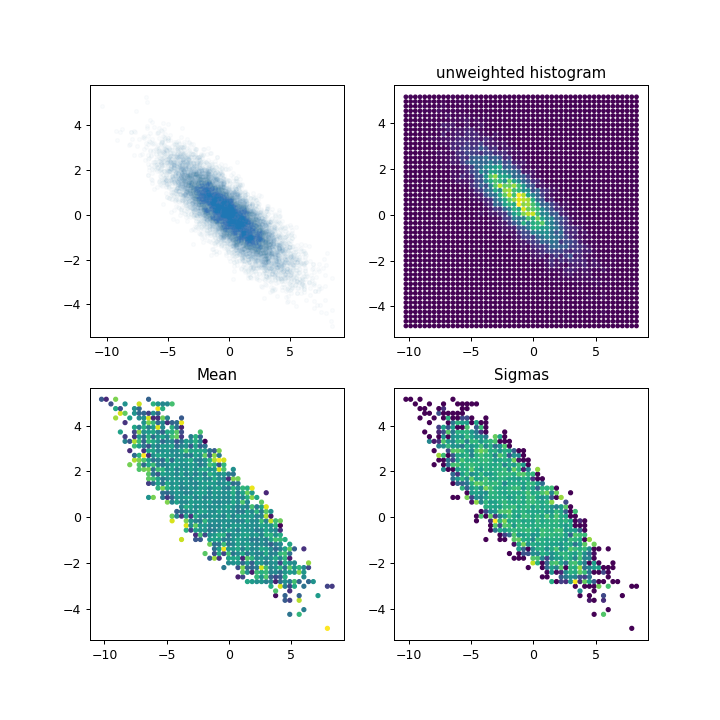

In [45]:
numpy_2d = np.random.multivariate_normal

cov = np.array([[6, -3], [-3, 1]])  # to generate our testing dataset
pts = numpy_2d([0, 0], cov, size=10000)
x,y = pts[:, 0], pts[:, 1]

pf2d = Histograms.Profile2D(50,50)
pf2d.fill(x,y)


fig2 = plt.figure(figsize=(8,8))
fig2.add_subplot(221)
plt.plot(x,y, '.', alpha=0.02)

ax=fig2.add_subplot(222)
ax.set_title("unweighted histogram")
plt.scatter(pf2d.getBinsX(), pf2d.getBinsY(), c=pf2d.getCount() ,s=8, cmap="viridis")

ax=fig2.add_subplot(223)
ax.set_title("Mean")
plt.scatter(pf2d.getBinsX(), pf2d.getBinsY(), c=pf2d.getMeans() ,s=8, cmap="viridis")

ax=fig2.add_subplot(224)
ax.set_title("Sigmas")
plt.scatter(pf2d.getBinsX(), pf2d.getBinsY(), c=pf2d.getSigmas() ,s=8, cmap="viridis")

<IPython.core.display.Javascript object>


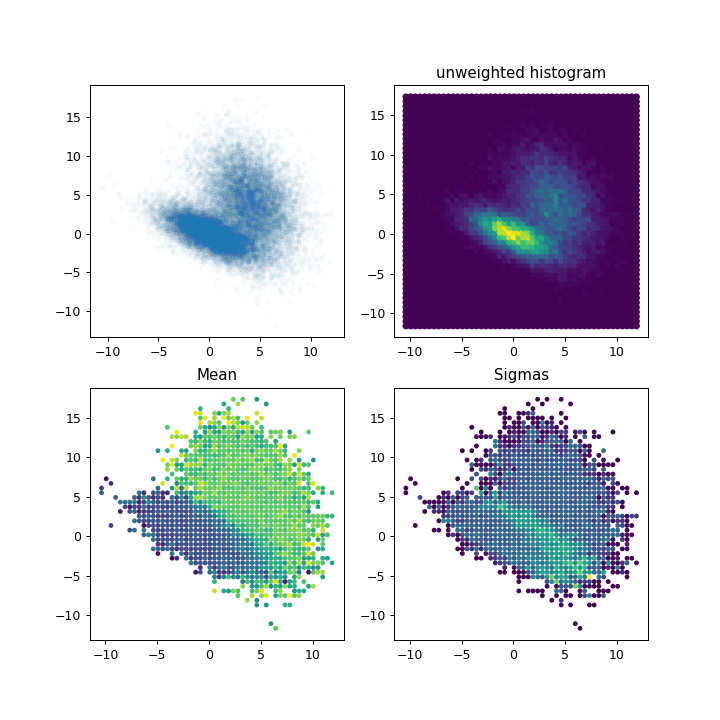

In [58]:
numpy_2d = np.random.multivariate_normal  # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
cov1 = np.array([[6, -3], [-3, 15]])

pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([4, 4], cov1, size=10000)))
x,y = pts[:, 0], pts[:, 1]

pf2d = Histograms.Profile2D(50,50)
pf2d.fill(x,y)

fig2 = plt.figure(figsize=(8,8))
fig2.add_subplot(221)
plt.plot(x,y, '.', alpha=0.02)

ax=fig2.add_subplot(222)
ax.set_title("unweighted histogram")
plt.scatter(pf2d.getBinsX(), pf2d.getBinsY(), c=pf2d.getCount() ,s=20, cmap="viridis")

ax=fig2.add_subplot(223)
ax.set_title("Mean")
plt.scatter(pf2d.getBinsX(), pf2d.getBinsY(), c=pf2d.getMeans() ,s=8, cmap="viridis")

ax=fig2.add_subplot(224)
ax.set_title("Sigmas")
plt.scatter(pf2d.getBinsX(), pf2d.getBinsY(), c=pf2d.getSigmas() ,s=8, cmap="viridis")

<IPython.core.display.Javascript object>


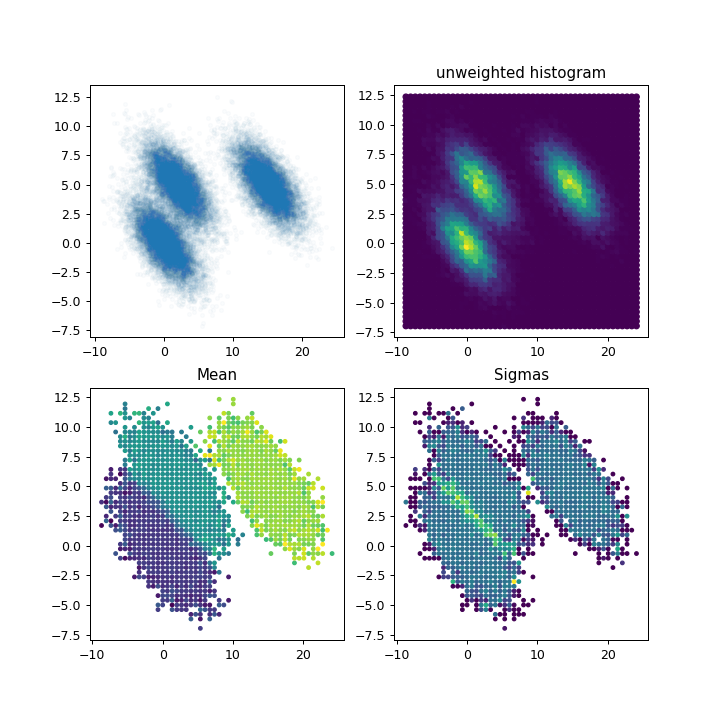

In [59]:
numpy_2d = np.random.multivariate_normal # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([2, 5], cov, size=10000)
                      ,numpy_2d([15, 5], cov, size=10000)))
x,y = pts[:, 0], pts[:, 1]

pf2d = Histograms.Profile2D(50,50)
pf2d.fill(x,y)

fig2 = plt.figure(figsize=(8,8))
fig2.add_subplot(221)
plt.plot(x,y, '.', alpha=0.02)

ax=fig2.add_subplot(222)
ax.set_title("unweighted histogram")
plt.scatter(pf2d.getBinsX(), pf2d.getBinsY(), c=pf2d.getCount() ,s=20, cmap="viridis")

ax=fig2.add_subplot(223)
ax.set_title("Mean")
plt.scatter(pf2d.getBinsX(), pf2d.getBinsY(), c=pf2d.getMeans() ,s=8, cmap="viridis")

ax=fig2.add_subplot(224)
ax.set_title("Sigmas")
plt.scatter(pf2d.getBinsX(), pf2d.getBinsY(), c=pf2d.getSigmas() ,s=8, cmap="viridis")